In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import webcolors

#Download once if using NLTK for preprocessing
import nltk

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans

# Pre processing

In [7]:
df = pd.read_csv("survey.csv")
df["industry"].fillna("Prefer not to answer", inplace=True)

In [8]:
text1 = df['industry']
text1

0         Education (Higher Education)
1                    Computing or Tech
2        Accounting, Banking & Finance
3                           Nonprofits
4        Accounting, Banking & Finance
                     ...              
26227                  Media & Digital
26228                       Nonprofits
26229                Computing or Tech
26230      Marketing, Advertising & PR
26231                              Law
Name: industry, Length: 26232, dtype: object

## Removing stopwords, punctuation and numbers

In [9]:
text2 = [remove_stopwords(x)\
        .translate(str.maketrans('','',string.punctuation))\
        .translate(str.maketrans('','',string.digits))\
        for x in text1]
text2

['Education Higher Education',
 'Computing Tech',
 'Accounting Banking  Finance',
 'Nonprofits',
 'Accounting Banking  Finance',
 'Education Higher Education',
 'Publishing',
 'Education PrimarySecondary',
 'Computing Tech',
 'Accounting Banking  Finance',
 'Nonprofits',
 'Education Higher Education',
 'Accounting Banking  Finance',
 'Law',
 'Health care',
 'Utilities  Telecommunications',
 'Business Consulting',
 'Art  Design',
 'Business Consulting',
 'Education Higher Education',
 'Health care',
 'Nonprofits',
 'Nonprofits',
 'Government Public Administration',
 'Public Library',
 'Education Higher Education',
 'Nonprofits',
 'Law',
 'Government Public Administration',
 'Engineering Manufacturing',
 'Nonprofits',
 'Media  Digital',
 'Accounting Banking  Finance',
 'Accounting Banking  Finance',
 'Nonprofits',
 'Education Higher Education',
 'Media  Digital',
 'Accounting Banking  Finance',
 'Government Public Administration',
 'Accounting Banking  Finance',
 'Engineering Manufacturi

## Stemming and making words lower case

In [10]:
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

In [11]:
text3 = pd.Series([stemSentence(x) for x in text2])

# Vectorization

##  Bag of words (counts the occurrences of words in a document)

In [12]:
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text3)

In [15]:
matrix = pd.concat([text1, pd.DataFrame(X_cv.toarray(), columns=vectorizer_cv.get_feature_names_out())], axis=1)
matrix.head(20)

,industry,academ,academia,academiacel,academicnonprofit,access,account,actuari,adjac,admin,...,wineri,work,workforc,workstudi,world,worth,write,year,yout,zoo
0,Education (Higher Education),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Computing or Tech,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Accounting, Banking & Finance",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nonprofits,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Accounting, Banking & Finance",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Education (Higher Education),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Publishing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Education (Primary/Secondary),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Computing or Tech,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"Accounting, Banking & Finance",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KMeans

In [65]:
sse={}
for k in np.arange(10,100,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_cv)
    sse[k] = kmeans.inertia_
fig = px.line(x=list(sse.keys()),y=list(sse.values()))
fig.show()

In [78]:
kmeans = KMeans(n_clusters=100)
kmeans.fit(X_cv)
result = pd.concat([text1,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())],axis=1)
result['cluster'] = kmeans.predict(X_cv)
result[["industry", "cluster"]], kmeans.inertia_

(                            industry  cluster
 0       Education (Higher Education)        1
 1                  Computing or Tech        0
 2      Accounting, Banking & Finance        3
 3                         Nonprofits        2
 4      Accounting, Banking & Finance        3
 ...                              ...      ...
 26227                Media & Digital       11
 26228                     Nonprofits        2
 26229              Computing or Tech        0
 26230    Marketing, Advertising & PR        9
 26231                            Law        5
 
 [26232 rows x 2 columns],
 1585.2259534146133)

In [79]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='industry' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')
result_labelled[["industry", "cluster", "label"]]

,industry,cluster,label
0,Education (Higher Education),1,educ higher
1,Computing or Tech,0,tech
2,"Accounting, Banking & Finance",3,account bank financ
3,Nonprofits,2,nonprofit
4,"Accounting, Banking & Finance",3,account bank financ
...,...,...,...
26227,Media & Digital,11,digit
26228,Nonprofits,2,nonprofit
26229,Computing or Tech,0,tech
26230,"Marketing, Advertising & PR",9,advertis market pr


In [150]:
pd.pivot_table(
    result_labelled,
    index=["label"],
    values=["industry"],
    aggfunc = "count"
).sort_values(
    "industry",
    ascending=False
).head(10)

,industry
label,
tech,4366
,2817
educ higher,2362
nonprofit,2339
administr govern public,1821
account bank financ,1688
engin,1520
advertis market pr,1064
law,1051


In [84]:
result_labelled["label"].nunique()

89

In [138]:
def harmonize_industries(x):
    industries = {
        "educ higher": "Education",
        "tech": "Technology",
        "account bank financ": "Banking & Insurance",
        "nonprofit": "Non Profit Organization",
        "publish": "Litterature",
        "educ": "Education",
        "law": "Law",
        "": "Other",
        "telecommun": "Technology",
        "busi": "Business & Consulting",
        "administr govern public": "Public & Government",
        "public": "Public & Government",
        "engin": "Technology",
        "digit": "Marketing",
        "advertis market pr": "Marketing",
        "retail": "Business & Consulting",
        "construct": "Construction",
        "biotechnolog": "Technology",
        "insur": "Banking & Insurance",
        "sale": "Business & Consulting",
        "energi": "Energy & Environment",
        "environment": "Energy & Environment",
        "logist": "Transports & Logistic",
        "medic": "Health",
        "research": "Research & Development",
        "hr recruit": "Human Ressources",
        "work": "Other",
        "librari": "Litterature",
        "architectur": "Construction",
        "industri": "Industry",
        "polit": "Politics",
        "administr": "Public & Government",
        "manufactur": "Industry",
        "technolog": "Technology",
        "pharmaceut": "Health",
        "agricultur forestri": "Agriculture & Food",
        "philanthropi": "Other",
        "consult": "Business & Consulting",
        "consult environment": "Business & Consulting",
        "cultur": "Culture",
        "museum": "Culture",
        "biotech": "Technology",
        "answer prefer": "Other",
        "servic": "Other",
        "health public": "Health",
        "enforc law secur": "Law",
        "leisur sport tourism": "Culture",
        "consum": "Marketing",
        "entertain": "Culture",
        "oil": "Industry",
        "veterinari": "Health",
        "food": "Agriculture & Food",
        "contractor": "Public & Government",
        "renew": "Energy & Environment",
        "librarian": "Litterature",
        "pharma": "Health",
        "defens": "Public & Government",
        "intern": "Other",
        "manag": "Other",
        "life scienc": "Sciences",
        "scienc": "Sciences",
        "develop": "Research & Development",
        "train": "Transports & Logistic",
        "distribut": "Industry",
        "scientif": "Sciences",
        "it": "Technology",
        "earli educ": "Education",
        "environment scienc": "Energy & Environment",
        "govt it job librari list nonprofit not that": "Other",
        "scientist": "Sciences",
        "commun": 'Technology',
        "game": "Technology",
        "clinic": "Health",
        "market": "Marketing",
        "manufactur pharmaceut": "Health",
        "biotechpharma": "Health",
        "chain suppli": "Industry",
        "contract govern": "Public & Government",
        "resourc": "Human Ressources",
        "contractor govt pay": "Public & Government",
        "funer": "Other",
        "translat": "Litterature",
        "automot": "Other",
        "mine": "Other",
        "research scienc": "Research & Development",
        "academia": "Education",
        "oceanographi research": "Research & Development",
        "chemic": "Sciences",
        "agenc alway brand broad but categori client compani frequent languag our pharmaceut servic unsur use": "Other"
    }

    return industries[x]

In [140]:
test = result_labelled["label"].apply(harmonize_industries)
test.nunique()

21

In [141]:
df["industry cluster"] = test

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race,industry cluster
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,Education
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,Technology
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,Banking & Insurance
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,Non Profit Organization
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,Banking & Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,5/17/2021 17:42:33,25-34,Media & Digital,Senior Reporter,Trade publication,85000,2000.0,USD,NaN,NaN,USA,New York,New York City,5-7 years,5-7 years,College degree,Woman,White,Marketing
26228,5/17/2021 17:46:38,35-44,Nonprofits,Production and Workflow Manager,NaN,40000,NaN,USD,NaN,NaN,USA,Pennsylvania,Pittsburgh,11 - 20 years,2 - 4 years,College degree,Woman,Asian or Asian American,Non Profit Organization
26229,5/17/2021 17:47:30,25-34,Computing or Tech,Chief of Staff,NaN,148000,29000.0,USD,NaN,NaN,USA,California,Bay Area,11 - 20 years,11 - 20 years,Master's degree,Woman,White,Technology
26230,5/17/2021 18:20:07,25-34,"Marketing, Advertising & PR",Digital Marketing Manager,"Small agency. I manage a team of ~15 people, b...",65000,5000.0,USD,NaN,NaN,USA,Washington,Seattle,2 - 4 years,2 - 4 years,College degree,Woman,White,Marketing


<AxesSubplot:xlabel='industry cluster', ylabel='count'>

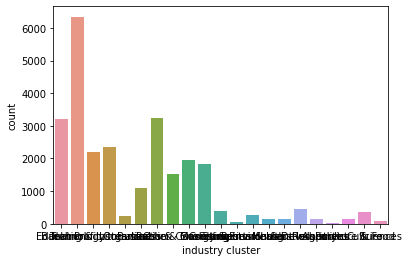

In [142]:
import seaborn as sns

sns.countplot(data=df, x="industry cluster")

In [143]:
df["industry cluster"].value_counts()

Technology                 6341
Other                      3253
Education                  3198
Non Profit Organization    2339
Banking & Insurance        2190
Public & Government        1961
Marketing                  1835
Business & Consulting      1539
Law                        1089
Human Ressources            438
Construction                394
Culture                     361
Transports & Logistic       281
Litterature                 251
Health                      159
Agriculture & Food          158
Research & Development      157
Industry                    138
Sciences                     77
Energy & Environment         58
Politics                     15
Name: industry cluster, dtype: int64

On a 3253 Other, ce qui peut correspondre à 3253 réalisations de base qu'on a pas pu assigner à un cluster, du coup si on ramène ceci au nombre total, on a théoriquement une "précision" de 87,6%.  
Maintenant on pourrait regarder plus en profondeur pour voir si on n'a pas des abbérations

In [148]:
df[df["industry cluster"]=="Non Profit Organization"][["industry", "industry cluster"]].value_counts()

industry                                industry cluster       
Nonprofits                              Non Profit Organization    2331
Computing/Tech + Higher Ed + Nonprofit  Non Profit Organization       1
Museum - Nonprofit                      Non Profit Organization       1
Museums: Nonprofit                      Non Profit Organization       1
Non-profit Theatre                      Non Profit Organization       1
Nonprofit - LORT D Theater              Non Profit Organization       1
Nonprofit - legal department            Non Profit Organization       1
Nonprofit association                   Non Profit Organization       1
Nonprofit scholarly society publisher   Non Profit Organization       1
dtype: int64

In [164]:
fig = px.bar(x=df.groupby("industry cluster").count().reset_index()["industry cluster"], y=df.groupby("industry cluster").count()["timestamp"])
fig.show()

In [165]:
df.to_csv("survey.csv")